# 🐍 **Introducción a Python para el Análisis de Datos**<br>

### 👨‍💻 Jorge Gómez Galván
* LinkedIn: [linkedin.com/in/jorgeggalvan/](https://www.linkedin.com/in/jorgeggalvan/) 
* E-mail: gomezgalvanjorge@gmail.com

## **Capítulo 5: Análisis Exploratorio de Datos (EDA)**
---

El Análisis Exploratorio de Datos o EDA, por sus siglas en inglés, es un conjunto de técnicas y procedimientos que permiten entender y explorar las principales características, relaciones y patrones de un conjunto de datos. En este sentido, la visualización de datos es una herramienta fundamental en el EDA. En este notebook se llevan a cabo varias técnicas de EDA para analizar datos acompañadas de visualizaciones para resaltar y entender aspectos clave.

*El notebook ha sido adaptado a partir del trabajo de Juan Martín Bellido, cuyo contenido original se encuentra en [este enlace](https://github.com/jmartinbellido/Python-Curso-Introductorio/blob/main/Capi%CC%81tulo%205%20Analisis%20Exploratorio.ipynb).*

### Índice
---

[1. Introducción al Análisis Exploratorio de Datos (EDA)](#5.1---Introducción-al-Análisis-Exploratorio-de-Datos-(EDA))  
[2. Series temporales](#5.2---Series-temporales)  
[3. Frecuencia](#5.3---Frecuencia)  
[4. Distribución](#5.4---Distribución)  
[5. Correlación](#5.5---Correlación)    

### 5.1 - Introducción al Análisis Exploratorio de Datos (EDA)
---

El Análisis Exploratorio de Datos (EDA) es el proceso inicial de exploración y comprensión de un conjunto de información cuantitativa, en el que se busca entender los datos y realizar los primeros hallazgos sin un objetivo específico predeterminado. El propósito es construir una visión general de los datos y una comprensión de su estructura para decidir qué puede ser relevantes o interesante destacar para un análisis más profundo.

👉 Este proceso implica examinar tablas y crear visualizaciones, ordenar los registros en rankings, observar relaciones entre variables, identificar valores atípicos, detectar posibles patrones interesantes o inusuales...

Para realizar un EDA de manera rápida, se puede utilizar paquetes como `ProfileReport()` de la librería YData Profiling, que genera un informe preliminar interactivo del DataFrame que ayuda a la exploración y comprensión de los datos. Este informe incluye estadísticas descriptivas, gráficos automáticos y detecta datos faltantes, entradas duplicadas y outliers, proporcionando una visión integral de los datos en una sola línea de código.

> ```python
> ProfileReport(df, title='Data Profiling Report', explorative=True)
> ```

In [1]:
# Importamos Pandas
import pandas as pd

In [2]:
# Importamos un DataFrame
df_jamesbond = pd.read_csv('./data/james_bond.csv')
df_jamesbond.head()

,Film,Year,Actor,Director,Shooting Locations,Box Office,Budget,Bond Actor Salary,IMDb Score
0,Dr. No,1962,Sean Connery,Terence Young,"England, Jamaica",448.8,7.0,0.6,7.2
1,From Russia with Love,1963,Sean Connery,Terence Young,"England, Scotland, Italy, Switzerland, Turkey",543.8,12.6,1.6,7.3
2,Goldfinger,1964,Sean Connery,Guy Hamilton,"England, Switzerland, United States",820.4,18.6,3.2,7.7
3,Thunderball,1965,Sean Connery,Terence Young,"England, France, Bahamas, United States",848.1,41.9,4.7,6.9
4,Casino Royale,1967,David Niven,Ken Hughes,"England, Ireland",260.0,70.0,NaN,5.0


In [3]:
# Importamos el módulo 'ProfileReport' de la librería YData Profiling
from ydata_profiling import ProfileReport

In [4]:
# Generamos el informe de perfil para el DataFrame
profile_report = ProfileReport(df_jamesbond, title='James Bond Data Profiling Report', explorative=True)

In [5]:
# Mostramos el informe
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 5.2 - Series temporales
---

Las series temporales son sucesiones de datos medidos en determinados momentos y ordenados cronológicamente. En este contexto, se analiza cómo evoluciona una variable numérica a lo largo del tiempo, permitiendo identificar tendencias, patrones temporales y estacionalidades.

#### Métodos para series temporales

Para la manipulación y exploración de datos de series temporales, existen diversos métodos en Pandas. A continuación, se presentan dos de los más útiles: `.rolling()` y `.diff()`.

##### Medias móviles

Las medias móviles son una técnica comúnmente utilizada para suavizar las fluctuaciones en los datos de un serie temporal al calcular el promedio de un número específico de datos recientes.

La sintaxis para calcular una media móvil con Pandas es la siguiente:

> ```python
> df['column_name'].rolling(num_periods).mean()
> ```

In [6]:
# Calculamos la media móvil de 'Box Office' de los considerando las últimas 3 películas
df_jamesbond['Box Office Moving AVG'] = df_jamesbond['Box Office'].rolling(3).mean().round(2)
df_jamesbond[['Film', 'Year', 'Box Office', 'Box Office Moving AVG']]

,Film,Year,Box Office,Box Office Moving AVG
0,Dr. No,1962,448.8,NaN
1,From Russia with Love,1963,543.8,NaN
2,Goldfinger,1964,820.4,604.33
3,Thunderball,1965,848.1,737.43
4,Casino Royale,1967,260.0,642.83
5,You Only Live Twice,1967,514.2,540.77
6,On Her Majesty's Secret Service,1969,291.5,355.23
7,Diamonds Are Forever,1971,442.5,416.07
8,Live and Let Die,1973,460.3,398.10
9,The Man with the Golden Gun,1974,334.0,412.27


##### Diferencias entre periodos

El método `.diff()` se utiliza para calcular la variación de un conjunto de datos, restando el valor de un período anterior del valor correspondiente al período actual.

> ```python
> df['column_name'].diff(num_periods)
> ```

In [7]:
# Calculamos el cambio en la puntuación de IMDb al restar la puntuación de la película anterior 
df_jamesbond['IMDb Score Change'] = df_jamesbond['IMDb Score'].diff()
df_jamesbond[['Film', 'Year', 'IMDb Score', 'IMDb Score Change']]

,Film,Year,IMDb Score,IMDb Score Change
0,Dr. No,1962,7.2,NaN
1,From Russia with Love,1963,7.3,0.1
2,Goldfinger,1964,7.7,0.4
3,Thunderball,1965,6.9,-0.8
4,Casino Royale,1967,5.0,-1.9
5,You Only Live Twice,1967,6.8,1.8
6,On Her Majesty's Secret Service,1969,6.7,-0.1
7,Diamonds Are Forever,1971,6.5,-0.2
8,Live and Let Die,1973,6.7,0.2
9,The Man with the Golden Gun,1974,6.7,0.0


#### Gráfico de serie temporal

Un gráfico de serie temporal permite visualizar cómo una o varias variables cambian a lo largo del tiempo, facilitando la interpretación de la evolución de los datos para identificar tendencias, patrones y comportamientos estacionales.

Para visualizar una serie temporal en Pandas, se utiliza el método `.plot()` en el DataFrame, especificando el eje x como la variable de tiempo y el eje y como la variable que se desea analizar.

> ```python
> df.plot(kind='line', x='date_column', y='numeric_column', 
>         title='Chart title', xlabel='Date label', ylabel='Value label', figsize=(width, height))
> ```

👉 El método `.plot()` ofrece la posibilidad de crear una gran variedad de visualizaciones al editar el parámetro `kind`.

In [8]:
# Utilizamos el "magic command" de Jupyter para desplegar gráficos
%matplotlib inline

# Importamos Matplotlib
import matplotlib.pyplot as plt

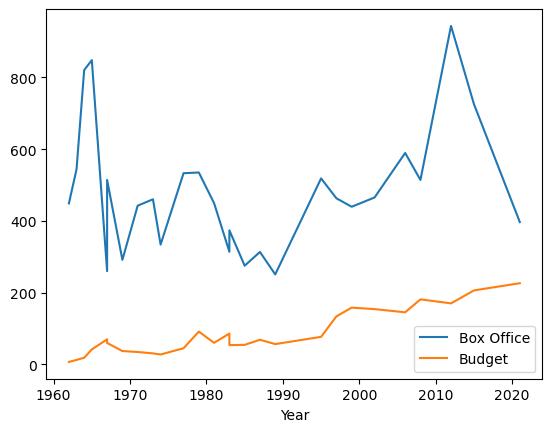

In [9]:
# Creamos un gráfico de serie temporal con la evolución de 'Box Office' y 'Budget' a lo largo de los años
df_jamesbond.plot(kind='line', x='Year', y=['Box Office','Budget'])
plt.show() # Utilizamos 'plt.show()' para desplegar el gráfico

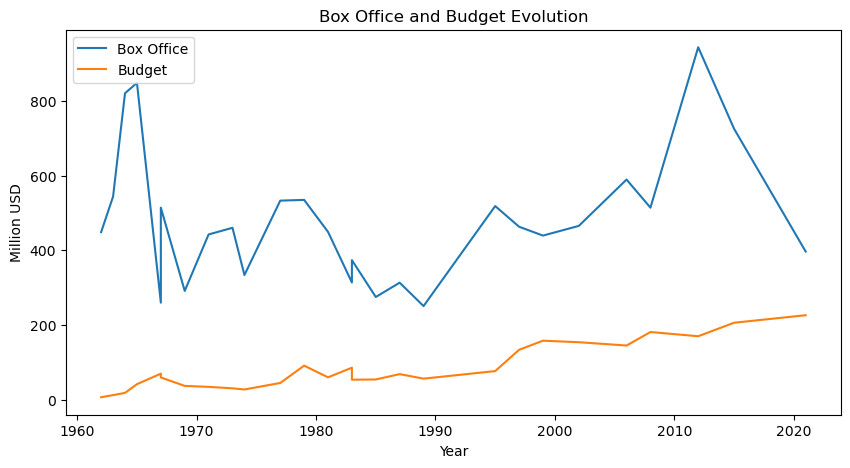

In [10]:
# Añadimos el título, las etiquetas a los ejes al gráfico
df_jamesbond.plot(kind='line', x='Year', y=['Box Office','Budget'],
                  title='Box Office and Budget Evolution', xlabel='Year', ylabel='Million USD',
                  figsize=(10,5))
plt.show()

👉 El parámetro `subplots` separa cada serie de datos en un gráfico independiente. Al hacerlo, cada variable cuenta con su propia escala, lo que permite comprender mejor sus variaciones, principalmente en casos donde las variables tengan escalas muy diferentes. Por otro lado, el parámetro `layout` permite definir la disposición de los gráficos generados con una tupla en la que se debe incluir el número de filas y columnas.

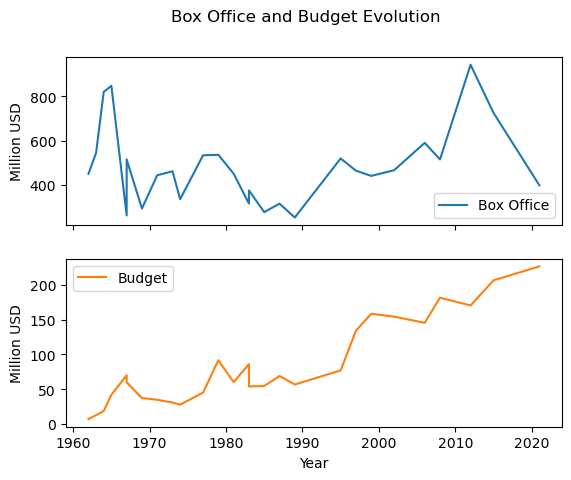

In [11]:
# Separamos cada serie en gráficos diferentes con el parámetro 'subplots'
df_jamesbond.plot(kind='line', x='Year', y=['Box Office','Budget'],
                  title='Box Office and Budget Evolution', ylabel='Million USD', xlabel='Year',
                  subplots=True, layout=(2,1))
plt.show()

### 5.3 - Frecuencia
---

Al explorar la frecuencia, se busca entender la cantidad de veces que aparece un valor o categoría en variables categóricas o variables continuas agrupadas en rangos.

#### Métodos para obtener métricas de frecuencia

Para analizar la frecuencia de aparición de los valores en un conjunto de datos, Pandas ofrece métodos como `.value_counts()` y `.describe()`.

##### Método `.value_counts()`

`.value_counts()` es el método principal en Pandas para calcular la frecuencia de aparición de cada valor único en una columna. Es particularmente útil cuando se quiere conocer cuántas veces se repite cada valor en una muestra. Además, permite ordenar los valores de mayor a menor frecuencia de forma automática.

> ```python
> df['category_column'].value_counts()
> ```

👉 Con el parámetro `normalize=True`, el método muestra las frecuencias en términos porcentuales en lugar de valores absolutos.

In [12]:
# Volvemos a importar el DataFrame
df_jamesbond = pd.read_csv('./data/james_bond.csv')

In [13]:
# Obtenemos la frecuencia absoluta de 'Actor'
df_jamesbond['Actor'].value_counts()

Actor
Sean Connery      7
Roger Moore       7
Daniel Craig      5
Pierce Brosnan    4
Timothy Dalton    2
David Niven       1
George Lazenby    1
Name: count, dtype: int64

In [14]:
# Obtenemos la frecuencia relativa de 'Actor'
df_jamesbond['Actor'].value_counts(normalize=True).round(2)

Actor
Sean Connery      0.26
Roger Moore       0.26
Daniel Craig      0.19
Pierce Brosnan    0.15
Timothy Dalton    0.07
David Niven       0.04
George Lazenby    0.04
Name: proportion, dtype: float64

In [15]:
# Obtenemos la frecuencia absoluta para cada combinación única de 'Director' y 'Actor'
df_jamesbond[['Director', 'Actor']].value_counts()

Director            Actor         
Terence Young       Sean Connery      3
John Glen           Roger Moore       3
Guy Hamilton        Sean Connery      2
Sam Mendes          Daniel Craig      2
John Glen           Timothy Dalton    2
Lewis Gilbert       Roger Moore       2
Guy Hamilton        Roger Moore       2
Martin Campbell     Pierce Brosnan    1
Roger Spottiswoode  Pierce Brosnan    1
Peter R. Hunt       George Lazenby    1
Michael Apted       Pierce Brosnan    1
Cary Joji Fukunaga  Daniel Craig      1
Martin Campbell     Daniel Craig      1
Marc Forster        Daniel Craig      1
Lee Tamahori        Pierce Brosnan    1
Ken Hughes          David Niven       1
Irvin Kershner      Sean Connery      1
Lewis Gilbert       Sean Connery      1
Name: count, dtype: int64

##### Método `.describe()`

El método `.describe()` permite obtener estadísticas descriptivas tanto de variables numéricas como categóricas. Al aplicarlo en una columna categórica, se obtiene un resumen básico de su frecuencia y variabilidad, incluyendo métricas como el conteo de valores únicos, el valor más frecuente (moda) y su frecuencia.

> ```python
> df['category_column'].describe()
> ```

In [16]:
# Obtenemos métricas frecuencias de 'Director' y 'Actor'
df_jamesbond[['Director', 'Actor']].describe()

,Director,Actor
count,27,27
unique,14,7
top,John Glen,Sean Connery
freq,5,7


#### Gráficos de barras

Un gráfico de barras muestra la frecuencia o la cantidad de repeticiones de cada categoría para comparar diferentes categorías entre sí.

Para representar la frecuencia a través de un gráfico de barras, se utiliza el método `.plot()`, especificando `bar` o `barh` en el parámetro `kind` para crear barras de forma vertical u horizontal, respectivamente.

##### Gráfico de barras verticales

La sintaxis general del método `.plot()`, para crear gráficos de barras verticales, es la siguiente:

> ```python
> df['category_column'].value_counts().plot(kind='bar', x='category_column', 
>                                           title='Chart title', xlabel='Category label', ylabel='Value label', 
>                                           figsize=(width, height))
> ```

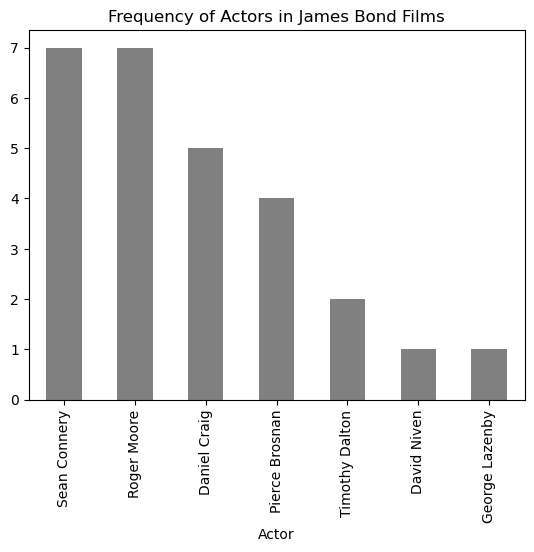

In [17]:
# Creamos un gráfico de barras con la frecuencia de aparición de cada actor 
df_jamesbond['Actor'].value_counts().plot(kind='bar', x='Actor', title='Frequency of Actors in James Bond Films', color='grey')
plt.show()

##### Gráfico de barras horizontales

La sintaxis general del método `.plot()`, para crear gráficos de barras horizontales, es la siguiente:

> ```python
> df['category_column'].value_counts().plot(kind='barh', x='category_column', 
>                                           title='Chart title', xlabel='Value label', ylabel='Category label', 
>                                           figsize=(width, height))
> ```

Para que las barras se presenten de mayor a menor, se tiene que ordenar el DataFrame con `.sort_values()` antes de graficar.

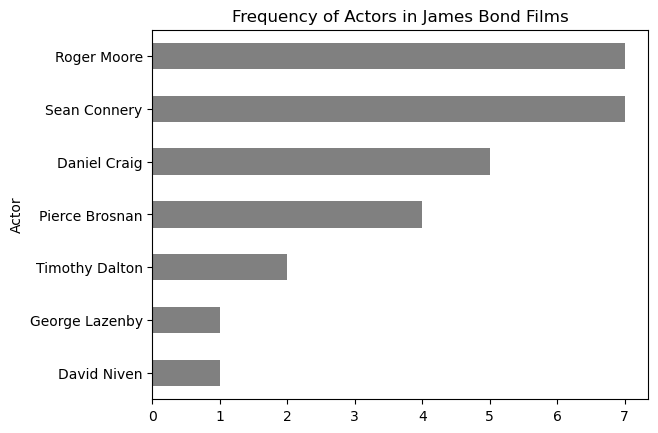

In [18]:
# Creamos un gráfico de barras de manera horizontal con la frecuencia de aparición de cada actor
df_jamesbond['Actor'].value_counts().sort_values().plot(kind='barh', x='Actor', title='Frequency of Actors in James Bond Films', color='grey')
plt.show()

### 5.4 - Distribución
---

El análisis de la distribución tiene como objetivo interpretar y medir la concentración o dispersión de una variable numérica en una muestra.

#### Métodos para obtener métricas de distribución

El método `.describe()` de Pandas también permite centrarse en la distribución de los datos, proporcionando un resumen estadístico de variables numéricas.

##### Método `.describe()`

Al aplicar el método `.describe()` a todo el DataFrame o a columnas numéricas, se proporcionan estadísticas, incluyendo el recuento, la media, la desviación estándar y los valores mínimos y máximos, así como los cuartiles o percentiles.

In [19]:
# Obtenemos estadísticas descriptivas específicas para 'Box Office' y 'Budget'
df_jamesbond[['Box Office', 'Budget']].describe()

,Box Office,Budget
count,27.000000,27.000000
mean,483.866667,85.559259
std,178.752056,62.692898
min,250.900000,7.000000
25%,353.900000,39.600000
50%,460.300000,60.200000
75%,534.000000,139.600000
max,943.500000,226.400000


In [20]:
# Obtenemos las estadísticas descriptivas para todas las columnas numéricas en el DataFrame
df_jamesbond.describe()

,Year,Box Office,Budget,Bond Actor Salary,IMDb Score
count,27.000000,27.000000,27.000000,18.000000,27.000000
mean,1984.962963,483.866667,85.559259,6.850000,6.751852
std,17.526862,178.752056,62.692898,4.805175,0.602795
min,1962.000000,250.900000,7.000000,0.600000,5.000000
25%,1970.000000,353.900000,39.600000,3.575000,6.500000
50%,1983.000000,460.300000,60.200000,5.500000,6.700000
75%,1998.000000,534.000000,139.600000,8.850000,7.100000
max,2021.000000,943.500000,226.400000,17.900000,8.000000


#### Histograma

Un histograma representa visualmente la distribución de una variable numérica, mostrando la frecuencia con la que ocurren diferentes rangos de valores. En un histograma, el eje horizontal (x) representa los intervalos de valores, mientras que el eje vertical (y) muestra la frecuencia de los datos.

Para crear un histograma, se puede utilizar los métodos de Pandas o la función de Seaborn, una de las librerías de visualización más populares y versátiles en Python.

##### Histograma con `.hist()`

La sintaxis general del método `.hist()` es la siguiente:

> ```python
> df['numeric_column'].hist(bins=num_bins, grid=True/False, density=True/False)
> ```

El parámetro `density` muestra la densidad de probabilidad en lugar de la frecuencia si se establece en `True`.

👉 Además, se puede usar el parámetro `by=df['categoric_column']` para crear histogramas separados por una variable categórica, con el objetivo de comparar distribuciones en diferentes grupos.

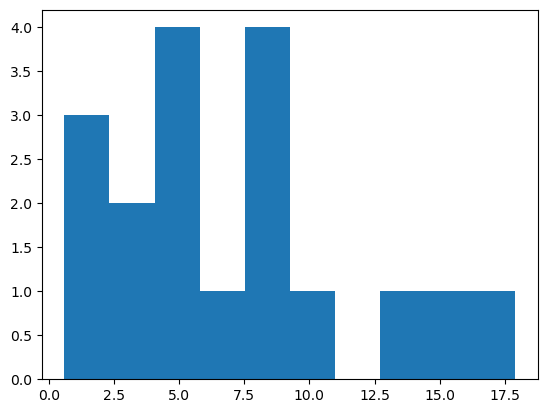

In [21]:
# Creamos un histograma de los salarios de los actores con '.hist()'
df_jamesbond['Bond Actor Salary'].hist(bins=10, grid=False)
plt.show()

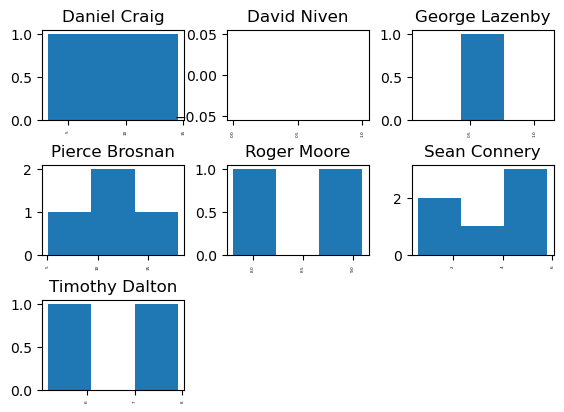

In [22]:
# Dividimos la distribución en histogramas separados por actor
df_jamesbond['Bond Actor Salary'].hist(bins=3, by=df_jamesbond['Actor'], grid=False, xlabelsize=3)
plt.show()

##### Histograma con `.plot()`

La sintaxis general del método `.plot()`, para crear histogramas, es la siguiente:

> ```python
> df.plot(kind='hist', y='numeric_column', bins=num_bins, density=True/False,
>         title='Chart title', ylabel='Frequency label', figsize=(width, height))
> ```

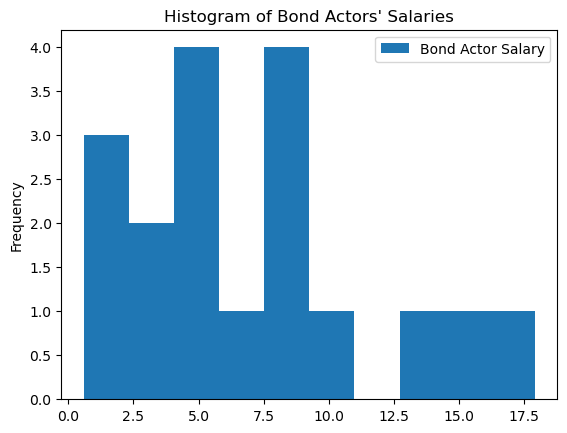

In [23]:
# Creamos un histograma de los salarios de los actores con '.plot()'
df_jamesbond.plot(kind='hist', y='Bond Actor Salary', bins=10, title="Histogram of Bond Actors' Salaries")
plt.show()

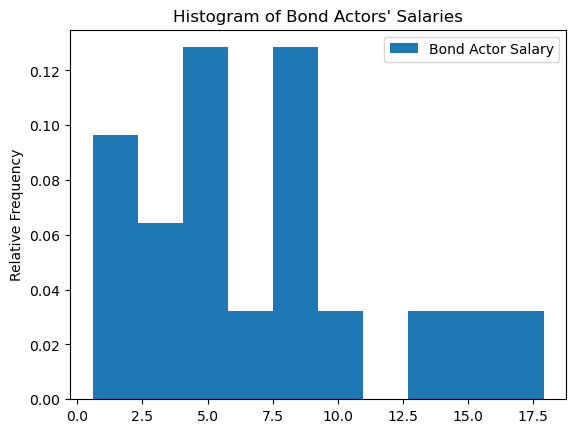

In [24]:
# Mostramos la frecuencia porcentual para el histograma
df_jamesbond.plot(kind='hist', y='Bond Actor Salary', bins=10, density=True,
                  title="Histogram of Bond Actors' Salaries", ylabel='Relative Frequency')
plt.show()

##### Histograma con `sns.histplot()`

La sintaxis general de la función `sns.histplot()` es la siguiente:

> ```python
> sns.histplot(df, x='numeric_column', bins=num_bins, kde=True/False)
> ```

Además de los parámetros básicos, `sns.histplot()` permite ajustar la estadística mostrada en el gráfico mediante el parámetro `stat`, que puede tomar los valores `'count'`, `'frequency'`, `'density'` o `'probability'`. También se puede utilizar `hue` para visualizar la distribución de los datos según una variable categórica.

In [25]:
# Importamos Seaborn
import seaborn as sns

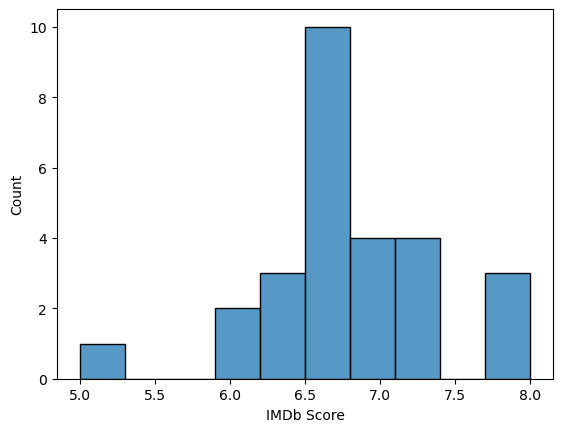

In [26]:
# Creamos un histograma con 'sns.histplot()' para mostrar la distribución del 'IMDb Score'
sns.histplot(df_jamesbond['IMDb Score'], bins=10)
plt.show()

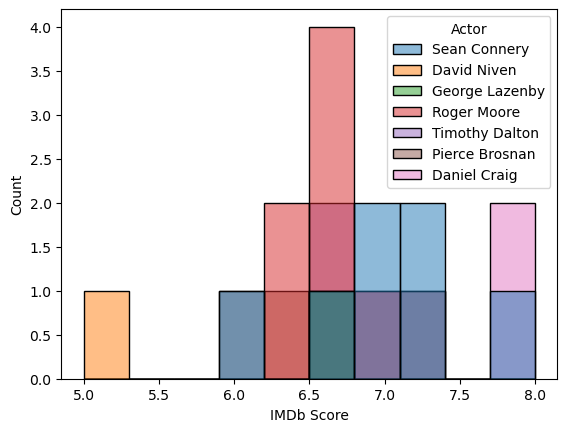

In [27]:
# Diferenciamos la distribución de 'IMDb Score' por colores
sns.histplot(df_jamesbond, x='IMDb Score', bins=10, hue='Actor')
plt.show()

#### Gráfico de densidad

Un gráfico de densidad muestra la distribución de una variable numérica. A diferencia de un histograma, que agrupa los datos en intervalos discretos (bins), un gráfico de densidad utiliza la función de densidad de probabilidad para estimar la distribución continua de los datos.

Para visualizar un gráfico de densidad, se utiliza el método `.plot()` con el parámetro `kind='density'` de Pandas o la función `sns.displot()` con `kind='kde'` de Seaborn.

##### Gráfico de densidad con `.plot()`

La sintaxis general del método `.plot()`, para crear gráficos de densidad, es la siguiente:

> ```python
> df.plot(kind='density', y='numeric_column',
>         title='Chart title', ylabel='Density label', figsize=(width, height))
> ```

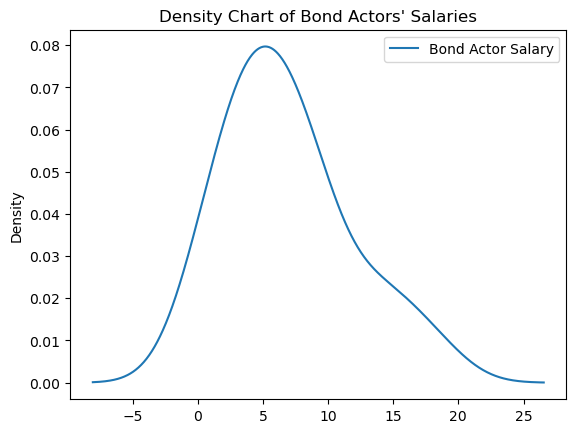

In [28]:
# Creamos con Seaborn el gráfico de densidad de los salarios de los actores con '.plot()'
df_jamesbond.plot(kind='density', y='Bond Actor Salary', title="Density Chart of Bond Actors' Salaries")
plt.show()

##### Gráfico de densidad con `sns.displot()`

La sintaxis general de la función `sns.displot()` es la siguiente:

> ```python
> sns.displot(df, kind='kde', x='numeric_column')
> ```

👉 Seaborn permite una mayor personalización y, mediante el parámetro `hue='category_column'`, se puede distinguir cada subgrupo de una variable categórica en todos sus tipos de gráficos.

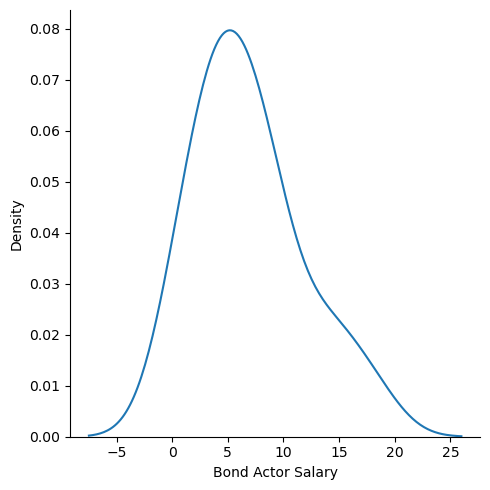

In [29]:
# Utilizamos Seaborn para visualizar el gráfico de densidad anterior
sns.displot(df_jamesbond, kind='kde', x='Bond Actor Salary')
plt.show()

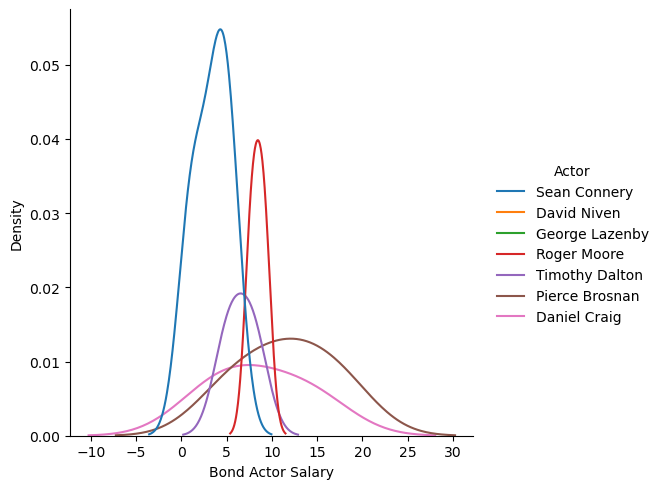

In [30]:
# Diferenciamos la distribución para cada actor utilizando el parámetro 'hue'
sns.displot(df_jamesbond, kind='kde', x='Bond Actor Salary', hue='Actor', warn_singular=False)
plt.show()

#### Gráfico de densidad acumulativa

Un gráfico de densidad acumulativa (ECDF) permite visualizar los valores acumulados de una variable para un porcentaje de las observaciones.

Para generar un gráfico de densidad acumulativa, se puede utilizar la función `sns.ecdfplot()` de Seaborn con la siguiente sintaxsis:

> ```python
> sns.ecdfplot(df, x='numeric_column')
> ```

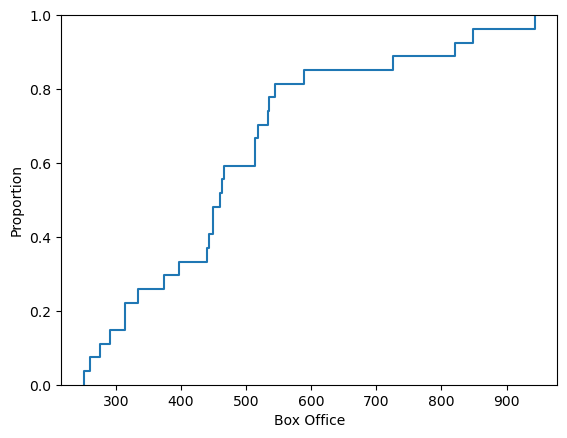

In [31]:
# Creamos un gráfico de densidad acumulativa con los valores acumulados de 'Box Office'
sns.ecdfplot(df_jamesbond, x='Box Office')
plt.show()

#### Boxplot

Un boxplot es una visualización para analizar la distribución de los datos a través de sus cuartiles. A su vez, permite la comparación de distribuciones entre diferentes grupos definidos por una variable categórica.

Para crear un boxplot, se puede utilizar una de las sintaxis de Pandas o Seaborn.

##### Boxplot con `.boxplot()`

La sintaxis general del método `.boxplot()` es la siguiente:

> ```python
> df.boxplot(column='numeric_column', by='', grid=True/False, figsize=(width, height))
> ```

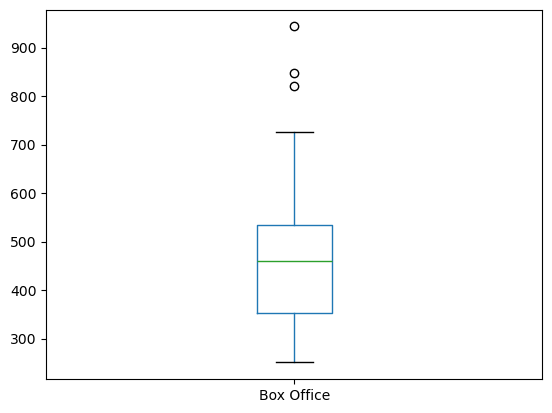

In [32]:
# Creamos un boxplot de la distribución de 'Box Office' usando '.boxplot()'
df_jamesbond.boxplot(column='Box Office', grid=False)
plt.show()

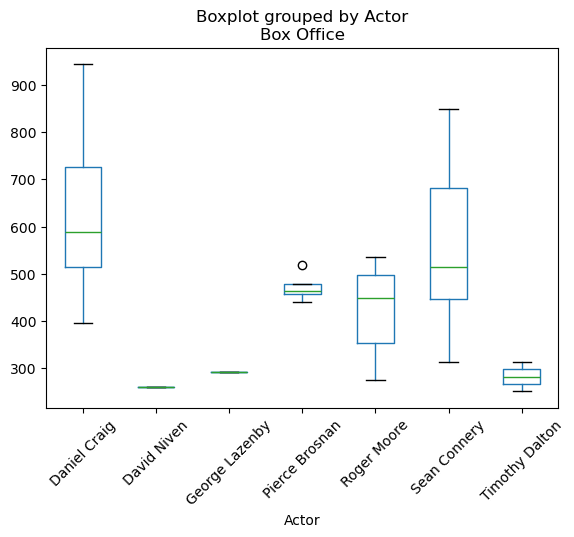

In [33]:
# Agrupamos por 'Actor' para visualizar un boxplot de 'Box Office' para cada actor
df_jamesbond.boxplot(column='Box Office', by='Actor', grid=False, rot=45) # Rotamos las etiquetas del eje x con 'rot'
plt.show()

##### Boxplot con `.plot()`

La sintaxis general del método `.boxplot()`, para crear boxplots, es la siguiente:

> ```python
> df.plot(kind='box', y='numeric_column', grid=True/False, figsize=(width, height),
>         title='Chart title', xlabel='Category label', ylabel='Value label')
> ```

Se puede agrupar por una columna categórica utilizando el parámetro `by='categoric_column'`.

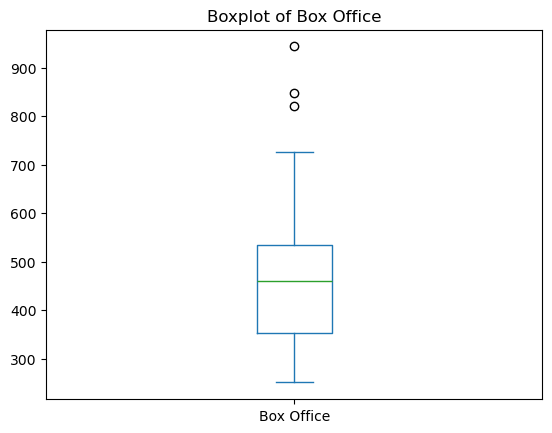

In [34]:
# Creamos un boxplot de 'Box Office' con el método '.plot'
df_jamesbond.plot(kind='box', y='Box Office', grid=False, title='Boxplot of Box Office')
plt.show()

##### Boxplot con `sns.boxplot()`

La sintaxis general de la función `sns.boxplot()` es la siguiente:

> ```python
> sns.boxplot(data=df, y='numeric_column')
> ```

Para agrupar por una variable categórica, hay que emplear el parámetro `x='categoric_column'`.

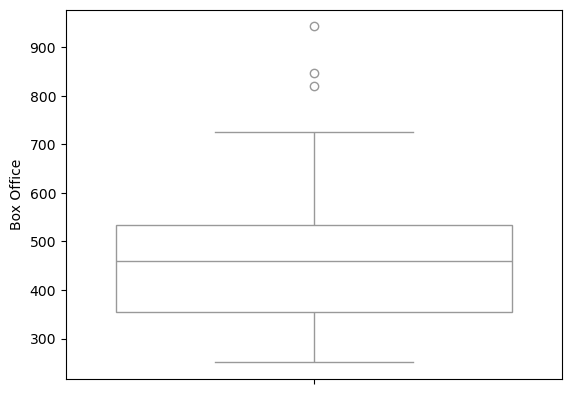

In [35]:
# Creamos un boxplot de 'Box Office' con Seaborn
sns.boxplot(df_jamesbond, y='Box Office', color='white')
plt.show()

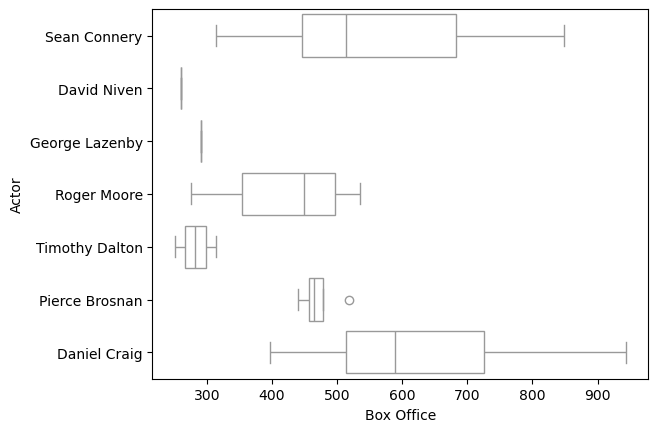

In [36]:
# Agrupamos por 'Actor' el boxplot de 'Box Office', intercambiando 'x' e 'y' para mejorar la visualización de las etiquetas
sns.boxplot(data=df_jamesbond, y='Actor', x='Box Office', color='white')
plt.show()

#### Matriz de dispersión

Una matriz de dispersión es una visualización que combina histogramas y gráficos de dispersión para cada combinación entre variables numéricas, organizándolos en una estructura matricial. Es una representación especialmente útil para explorar múltiples variables numéricas simultáneamente.

Para crear una matriz de dispersión en Python, se pueden utilizar las funciones específicas de Seaborn o de Pandas Plotting.

##### Matriz de dispersión con `sns.pairplot()`

La sintaxis general de la función `sns.pairplot()` es la siguiente:

> ```python
> sns.pairplot(df, height=height_graph)
> ```

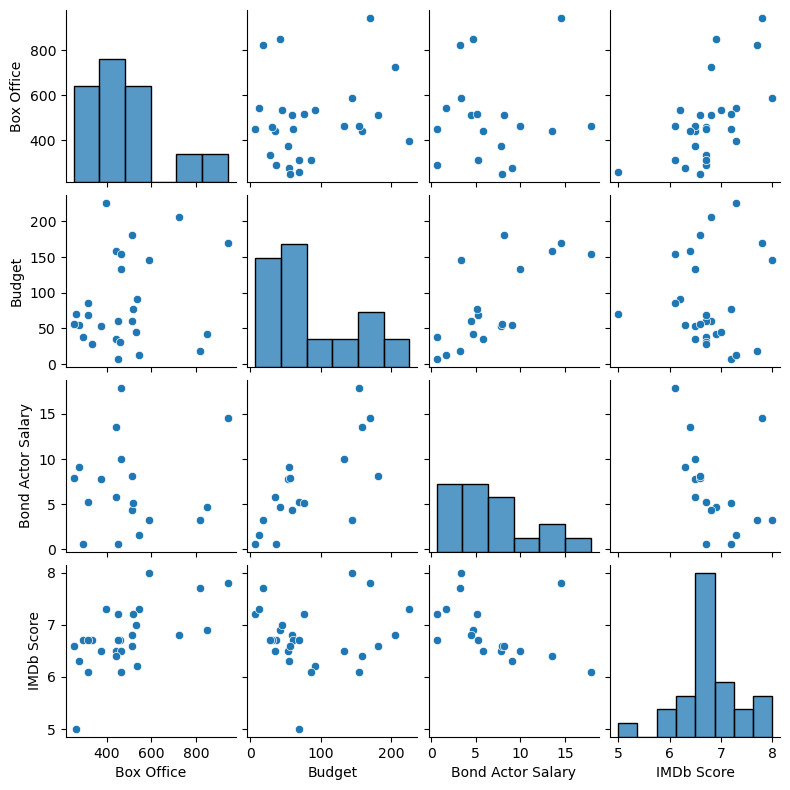

In [37]:
# Creamos una matriz de dispersión para las variables numéricas del DataFrame con 'sns.pairplot()'
sns.pairplot(df_jamesbond[['Box Office', 'Budget', 'Bond Actor Salary', 'IMDb Score']], height=2)
plt.show()

##### Matriz de dispersión con `scatter_matrix()`

La sintaxis general de la función `scatter_matrix()` es la siguiente:

> ```python
> scatter_matrix(df, figsize=(width, height))
> ```

In [38]:
# Importamos el módulo 'scatter_matrix' de Pandas Plotting
from pandas.plotting import scatter_matrix

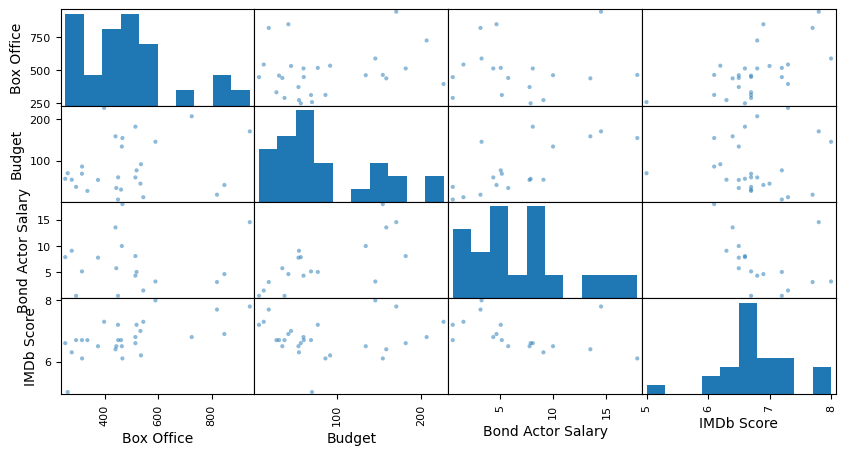

In [39]:
# Creamos nuevamente la matriz de disperación, pero esta vez empleando '.scatter_matrix()'
scatter_matrix(df_jamesbond[['Box Office', 'Budget', 'Bond Actor Salary', 'IMDb Score']], figsize=(10,5))
plt.show()

### 5.5 - Correlación
---

La correlación permite cuantificar el grado de asociación entre dos variables numéricas y comprender la dirección de esta relación. 

#### Funciones para obtener la correlación

La correlación de Pearson es la medida más comúnmente utilizada para evaluar la relación lineal entre dos variables continuas. Una correlación positiva indica que, a medida que una variable aumenta, la otra también tiende a aumentar, mientras que una correlación negativa sugiere que, al aumentar una variable, la otra disminuye. 

La fuerza de la correlación se expresa en una escala de -1 a 1: 

- Si los valores son cercanos a 1, existe una correlación positiva entre las variables.
- Si los valores son cercanos 0, no existe correlación significativa entre las variables.
- Si los valores son cercanos -1, existe una correlación negativa entre las variables.

La función `scipy.stats.pearsonr(df['column_1'], df['column_2'])` de la librería Scipy permite calcular la correlación de Pearson entre dos variables continuas. Además, esta función devuelve el p-valor, que indica si la relación es estadísticamente significativa.

In [40]:
# Importamos Scipy
import scipy

In [41]:
# Calculamos el correlación entre 'Box Office' y 'Budget'
scipy.stats.pearsonr(df_jamesbond['Box Office'], df_jamesbond['Budget'])

PearsonRResult(statistic=0.21242235612909555, pvalue=0.2874422128278542)

In [42]:
# Calculamos el correlación entre 'Box Office' e 'IMDb Score'
scipy.stats.pearsonr(df_jamesbond['Box Office'], df_jamesbond['IMDb Score'])

PearsonRResult(statistic=0.6057695226047479, pvalue=0.0008123445389977105)

#### Matriz de correlación

El método `.corr()` permite construir una matriz de correlación. Una tabla que muestra el coeficiente de correlación para cada combinación disponible entre varias variables numéricas. 

👉 En una matriz de correlación, la diagonal siempre tiene un valor de 1 (o 100%), ya que representa la correlación de cada variable consigo misma.

In [43]:
# Calculamos la matriz de correlación para evaluar las relaciones entre las variables numéricas más relevantes
corr_matrix = df_jamesbond[['Box Office', 'Budget', 'Bond Actor Salary', 'IMDb Score']].corr()
corr_matrix

,Box Office,Budget,Bond Actor Salary,IMDb Score
Box Office,1.000000,0.212422,0.067717,0.605770
Budget,0.212422,1.000000,0.728390,0.063443
Bond Actor Salary,0.067717,0.728390,1.000000,-0.407572
IMDb Score,0.605770,0.063443,-0.407572,1.000000


#### Mapa de calor de correlación

Un mapa de calor de correlación es una visualización gráfica que representa las relaciones entre múltiples variables numéricas. Utilizando una escala de colores, este gráfico muestra la intensidad de las correlaciones entre cada par de variables en un formato matricial.

Para crear un mapa de calor de correlaciones en Python, se utiliza la función `sns.heatmap()`.

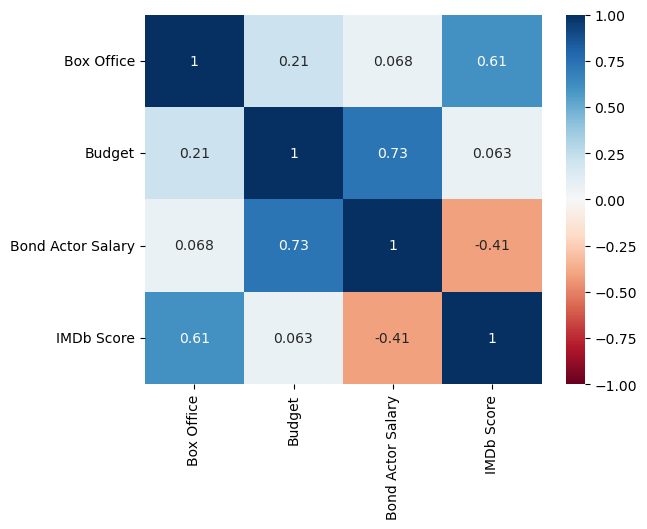

In [44]:
# Creamos un mapa de calor de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', vmin=-1)
plt.show()

#### Gráfico de dispersión

Un gráfico de dispersión muestra la relación entre dos variables numéricas. Cada punto en el gráfico representa un par de valores correspondientes a las dos variables. Este tipo de gráfico es una de las formas más claras de visualizar la correlación o idencualquier patrón entre dos variables numéricas.

Para crear un gráfico de dispersión, se puede utilizar Pandas o Seaborn.

##### Gráfico de dispersión con `.plot()`

La sintaxis general del método `.plot()`, para crear gráficos de dispersión, es la siguiente:

> ```python
> df.plot(kind='scatter', x='numeric_column_1', y='numeric_column_2', 
>         title='Chart title', xlabel='X-axis label', ylabel='Y-axis label', figsize=(width, height))
> ```

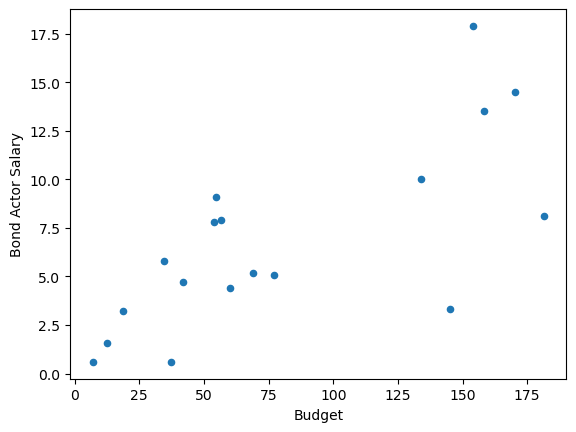

In [45]:
# Creamos un gráfico de dispersión entre 'Budget' y 'Bond Actor Salary' utilizando '.plot()'
df_jamesbond.plot(kind='scatter', x='Budget', y='Bond Actor Salary')
plt.show()

##### Gráfico de dispersión con `sns.scatterplot()`

La sintaxis general de la función `sns.scatterplot()` es la siguiente:

> ```python
> sns.scatterplot(df, x='numeric_column_1', y='numeric_column_2')
> ```

Como es habitual en Seaborn, el parámetro `hue` permite agregar una variable categórica para que los puntos se coloreen de acuerdo con dicha variable. 

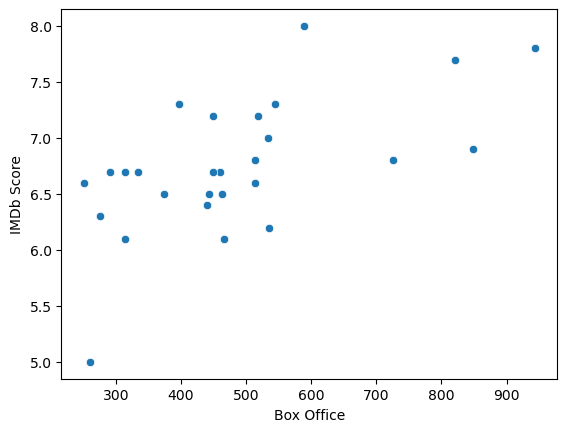

In [46]:
# Creamos un gráfico de dispersión entre 'Box Office' y 'IMDb Score' utilizando 'sns.scatterplot()'
sns.scatterplot(df_jamesbond, x='Box Office', y='IMDb Score')
plt.show()

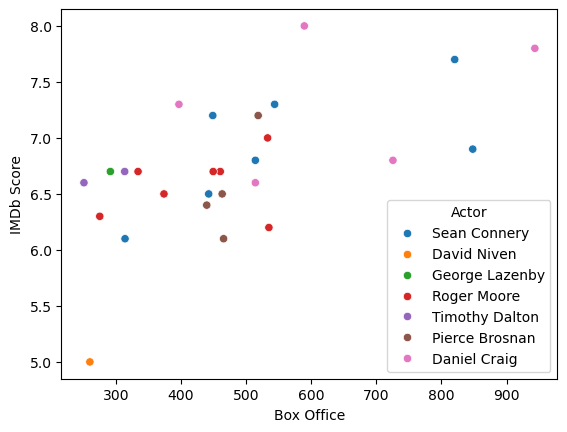

In [47]:
# Agrupamos por 'Actor' el gráfico de dispersión anterior
sns.scatterplot(df_jamesbond, x='Box Office', y='IMDb Score', hue='Actor')
plt.show()

El parámetro `market` permite cambiar el tipo de marcador en los gráficos de dispersión. A continuación, se presentan todas las opciones disponibles:

`'o'`: Círculo (marcador predeterminado)  
`'s'`: Cuadrado  
`'^'`: Triángulo hacia arriba  
`'v'`: Triángulo hacia abajo  
`'>'` : Triángulo hacia la derecha  
`'<'`: Triángulo hacia la izquierda  
`'d'`: Diamante  
`'*'`: Estrella  
`'p'`: Pentágono  
`'H'`: Hexágono (orientación hacia arriba)  
`'h'`: Hexágono (orientación hacia abajo)  
`'+'`: Cruz (más)  
`'x'`: Cruz (equis)  
`'|'`: Línea vertical  
`'-'`: Línea horizontal  

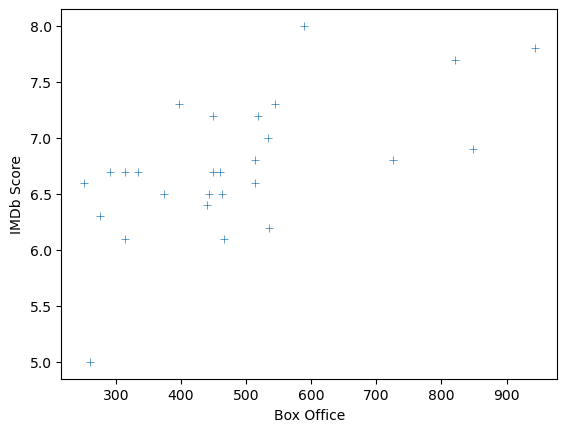

In [48]:
# Seleccionamos cruces como 'marker'
sns.scatterplot(df_jamesbond, x='Box Office', y='IMDb Score', marker='+')
plt.show()

##### Gráfico de dispersión con `sns.relplot()`

La sintaxis general de la función `sns.relplot()` es la siguiente:

> ```python
> sns.relplot(df, x='numeric_column_1', y='numeric_column_2')
> ```

👉 La función `sns.relplot` también incluye el parámetro `col`, que permite crear subgráficos en columnas separadas según los valores únicos de la columna especificada. Además, con el parámetro `col_wrap` se puede dividir los subgráficos en filas, limitando el número de columnas que se muestran por fila.

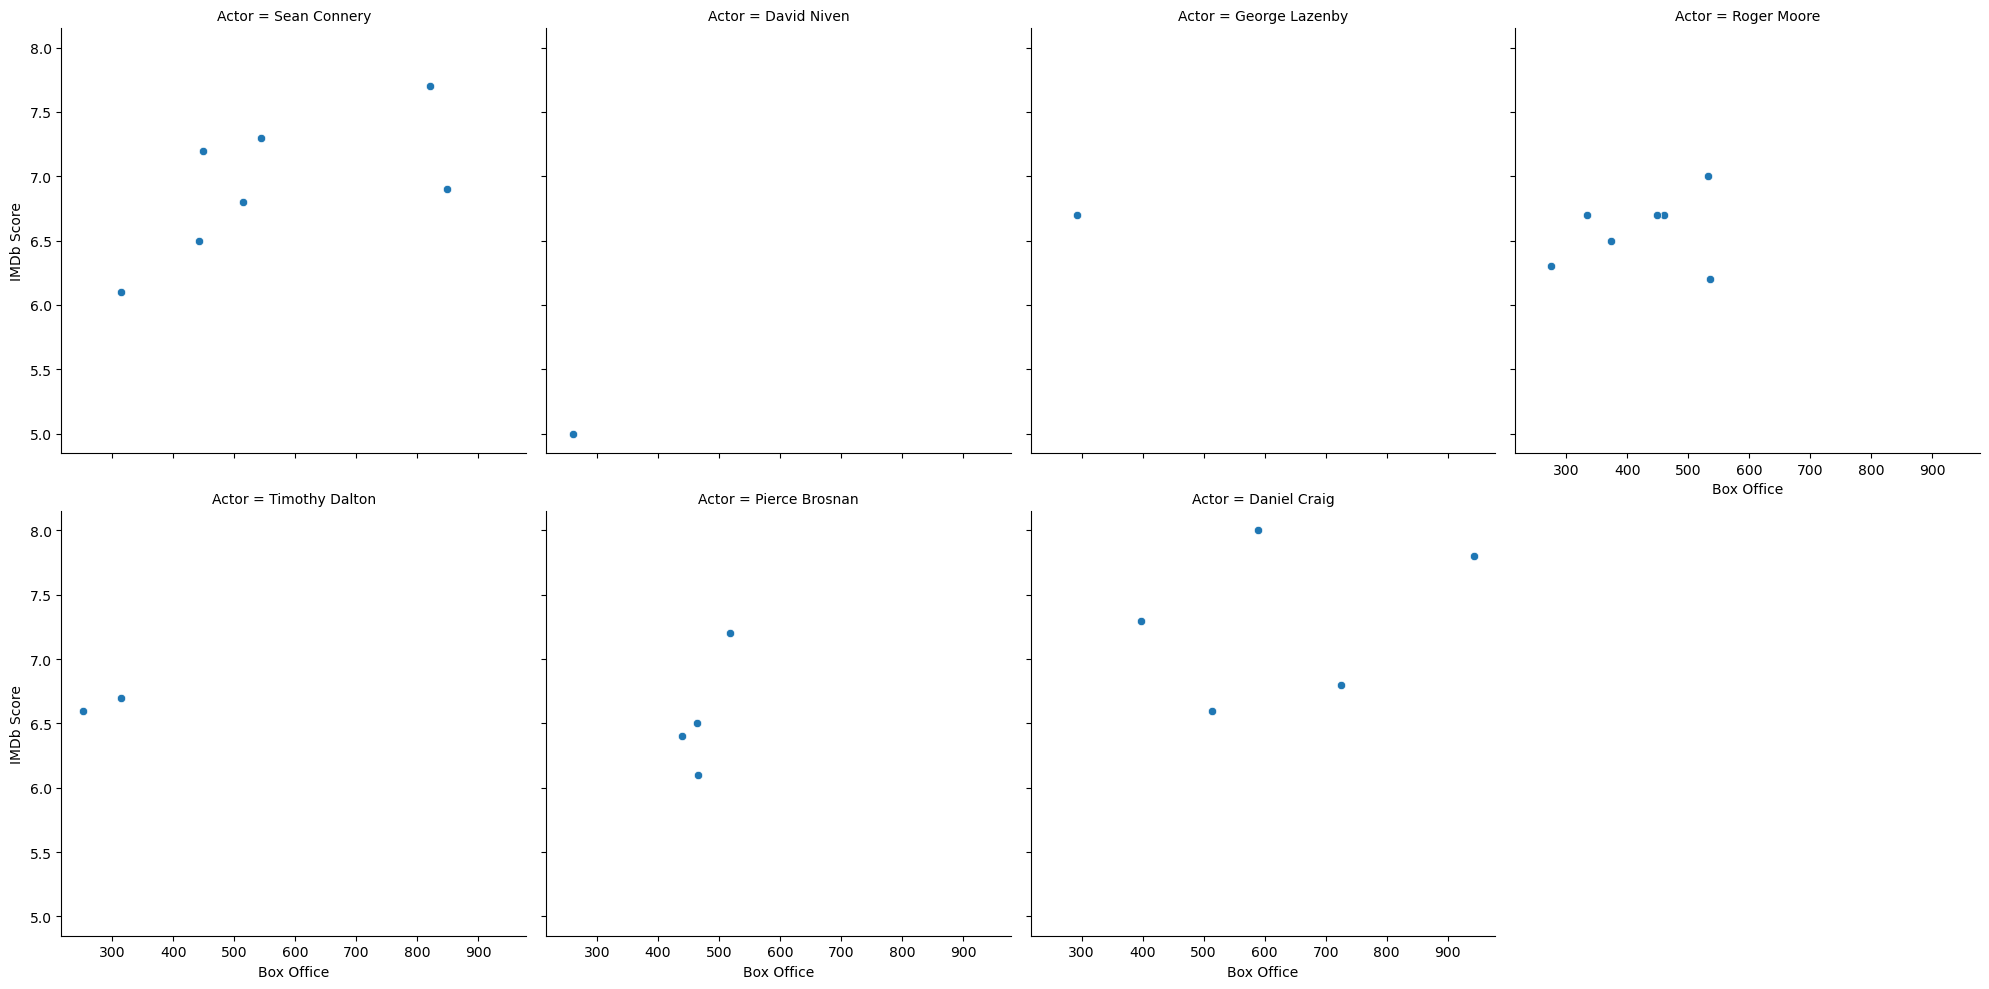

In [49]:
# Creamos un gráfico de dispersión para cada 'Actor' utilizando 'sns.relplot()'
sns.relplot(df_jamesbond, x='Box Office', y='IMDb Score', col='Actor', col_wrap=4)
plt.show()

### 5.6 - Ejercicios
---

📘 Puedes encontrar las soluciones a los ejercicios [aquí](https://github.com/jorgeggalvan/Data-Analysis-Fundamentals-with-Python/blob/main/Python_Data_Analysis_5.2_Exercises.ipynb).

#### Ejercicio 5.1

> Dataset a utilizar: `amzn_stock.csv`

**5.1A:** Representa visualmente la evolución temporal de la cotización 'Close' de las acciones de Amazon desde el 2020.

**5.1B:** Visualiza la evolución de las acciones de Amazon a lo largo del tiempo, mostrando dos subgráficos: uno para el precio de cierre y otro para el volumen de transacciones.

##### Ejercicio 5.1A

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 5.1B

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 5.2

> Dataset a utilizar: `imdb_movies.csv`

**5.2A:** Obtén los 10 actores con mayor cantidad de apariciones como protagonistas en películas ('actor_1_name').

**5.2B:** Genera un gráfico de barras horizontal para visualizar el resultado anterior.

##### Ejercicio 5.2A

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 5.2B

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 5.3

> Dataset a utilizar: `imdb_movies.csv`

**5.3A:** Crea un histograma para visualizar la distribución de la puntuación de IMDb ('imdb_score').

**5.3B:** Calcula las estadísticas descriptivas del campo 'imdb_score' y las estadísticas sobre la frecuencia de aparición del campo 'director_name'.

**5.3C:** Genera un gráfico de densidad para comparar la distribución de la columna 'imdb_score' para los 5 directores con mayor número de películas.

##### Ejercicio 5.3A

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 5.3B

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 5.3C

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 5.4

> Dataset a utilizar: `imdb_movies.csv`

Visualiza con un gráfico de densidad acumulativa (ECDF) la distribución de los ingresos brutos ('gross') de las películas españolas estrenadas a partir del año 2000.

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 5.5

> Dataset a utilizar: `world_countries.csv`

**5.5A:** Obtén las estadísticas descriptivas de la población, esperanza de vida y PIB de los países.

**5.5B:** Crea un gráfico de dispersión para visualizar las relaciones entre estas variables, diferenciando los continentes mediante colores.

##### Ejercicio 5.5A

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 5.5B

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 5.6

> Dataset a utilizar: `starbucks_beverages.csv`

Representa la distribución de las calorías en las bebidas de Starbucks según su categoría utilizando un boxplot.

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 5.7

> Dataset a utilizar: `starbucks_beverages.csv`

Crea un mapa de calor que muestre la matriz de correlación entre las diferentes variables de información nutricional de las bebidas de Starbucks.

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 5.8

> Dataset a utilizar: `fortune_1000.csv`

**5.8A:** Crea un gráfico de dispersión entre el cambio en el ranking ('Change in Rank') y los beneficios ('Profits') de las empresas.

**5.8B:** Calcula la correlación de Pearson entre el número de empleados ('Employees') y la facturación ('Revenue').

**5.8C:** Visualiza con un gráfico de disperación la relación entre las dos variables anteriores para las empresas de los sectores: 'Retailing', 'Food, Beverages & Tobacco' y 'Hotels, Restaurants & Leisure'.

##### Ejercicio 5.8A

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 5.8B

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 5.8C

In [ ]:
# Escribe la solución al ejercicio aquí